In [1]:
# Fix imports when running from notebooks/ folder
import sys
from pathlib import Path

project_root = Path.cwd().parent 
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

print(f"Added to path: {project_root}")

%load_ext autoreload
%autoreload 2

Added to path: /Users/elshaday/DEV/10Academy/customer-experience-analytics-week2


In [23]:
from src.data import DataManager
from src.analysis import SentimentAnalyzer
from tabulate import tabulate
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
# Load processed data

dm = DataManager()
reviews_df = dm.load_data()

In [4]:
print(tabulate(reviews_df.head(), headers="keys", tablefmt="psql"))

+----+--------------------------------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------+---------------------+--------+-------------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|    | review_id                            | review                                                                                                                                                                                                       

In [ ]:
# Rule Based Sentiment Analysis (VADER, TextBlob and BERT)
analyzer = SentimentAnalyzer(load_bert=False)
sentiment_df = analyzer.run_all(reviews_df["clean_review"].astype(str))
df = pd.concat([reviews_df, sentiment_df], axis=1)

print(tabulate(df.head(), headers="keys", tablefmt="psql"))

+----+--------------------------------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------+---------------------+--------+-------------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------------+---------------+------------------+------------------+
|    | review_id                            | review                                                                                                                                 

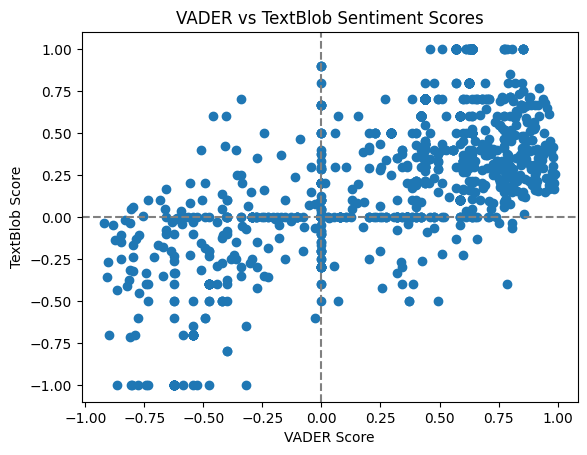

In [24]:
# VADER vs TextBlob

plt.scatter(df["vader_score"], df["textblob_score"])
plt.xlabel("VADER Score")
plt.ylabel("TextBlob Score")
plt.title("VADER vs TextBlob Sentiment Scores")
plt.axhline(0, color="gray", linestyle="--")
plt.axvline(0, color="gray", linestyle="--")
plt.show()

In [ ]:
print("Average sentiment by bank as per vader and textblob")

df.groupby("bank")[["vader_score", "textblob_score"]].mean()

,vader_score,textblob_score
bank,,
boa,0.117915,0.175944
cbe,0.296463,0.356951
dashen,0.397779,0.332665


In [27]:
print("Average sentiment for 1 star reviews of banks as per vader and textblob")

low_reviews_df = df[df["rating"] == 1]

low_reviews_df.groupby("bank")[["vader_score", "textblob_score"]].mean()

Average sentiment for 1 star reviews of banks as per vader and textblob


,vader_score,textblob_score
bank,,
boa,-0.176913,-0.129893
cbe,-0.073095,-0.082705
dashen,-0.120119,-0.120984
